In [3]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH +'Control 050721/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
import movie_structure
from  concurrent.futures import ThreadPoolExecutor
import preprocessing
import autocorrelation_and_structure_factor_IK_20220103 as iac
import importlib
from skimage import filters
from p_tqdm import p_map


In [3]:
gel = np.load(MOVIE_PATH +'np/gel_norm.npy', mmap_mode='r+')
mask = np.load(MOVIE_PATH +'np/mask.npy', mmap_mode='r+')

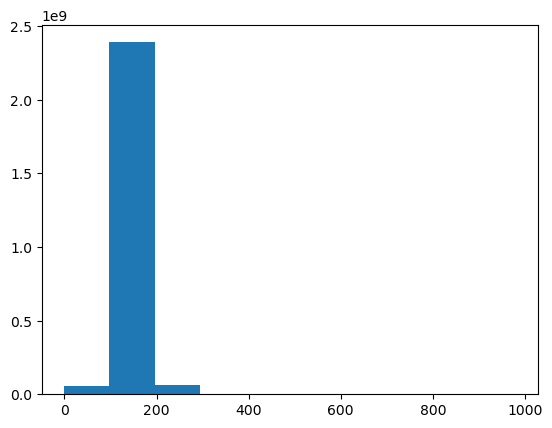

In [49]:
flat = gel.reshape(-1)
plt.hist(flat)
plt.show()

In [20]:
print ('gel min %f gel max %f' %(np.min(gel),np.max(gel)))


gel min 78.000000 gel max 1933.000000


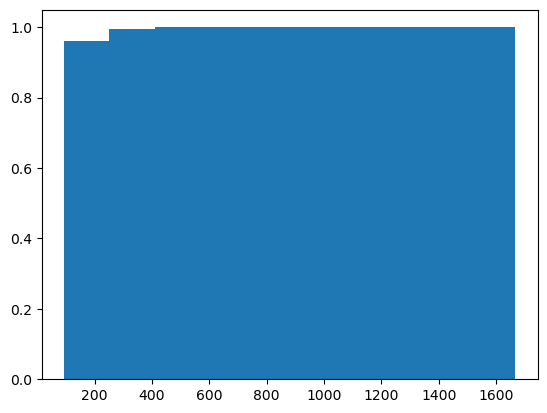

In [19]:
flat = gel[65].reshape(-1)[1:-1:10]
n, bins, patches = plt.hist(flat,cumulative=True, density=True)
plt.show()

In [53]:
min_intensity = bins[1]
max_intensity = 10000

threshold_gel = gaussian(gel[65],3)
threshold_gel[threshold_gel<min_intensity] =0
threshold_gel[threshold_gel>max_intensity] = 0
threshold_gel[np.bitwise_and(threshold_gel>= min_intensity , threshold_gel<= max_intensity)] =1

# np.save(DATA_PATH + 'tmp/t_gel.npy', threshold_gel)



C:\Users\amityu\Anaconda3\lib\site-packages\napari\_qt\__init__.py:53: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


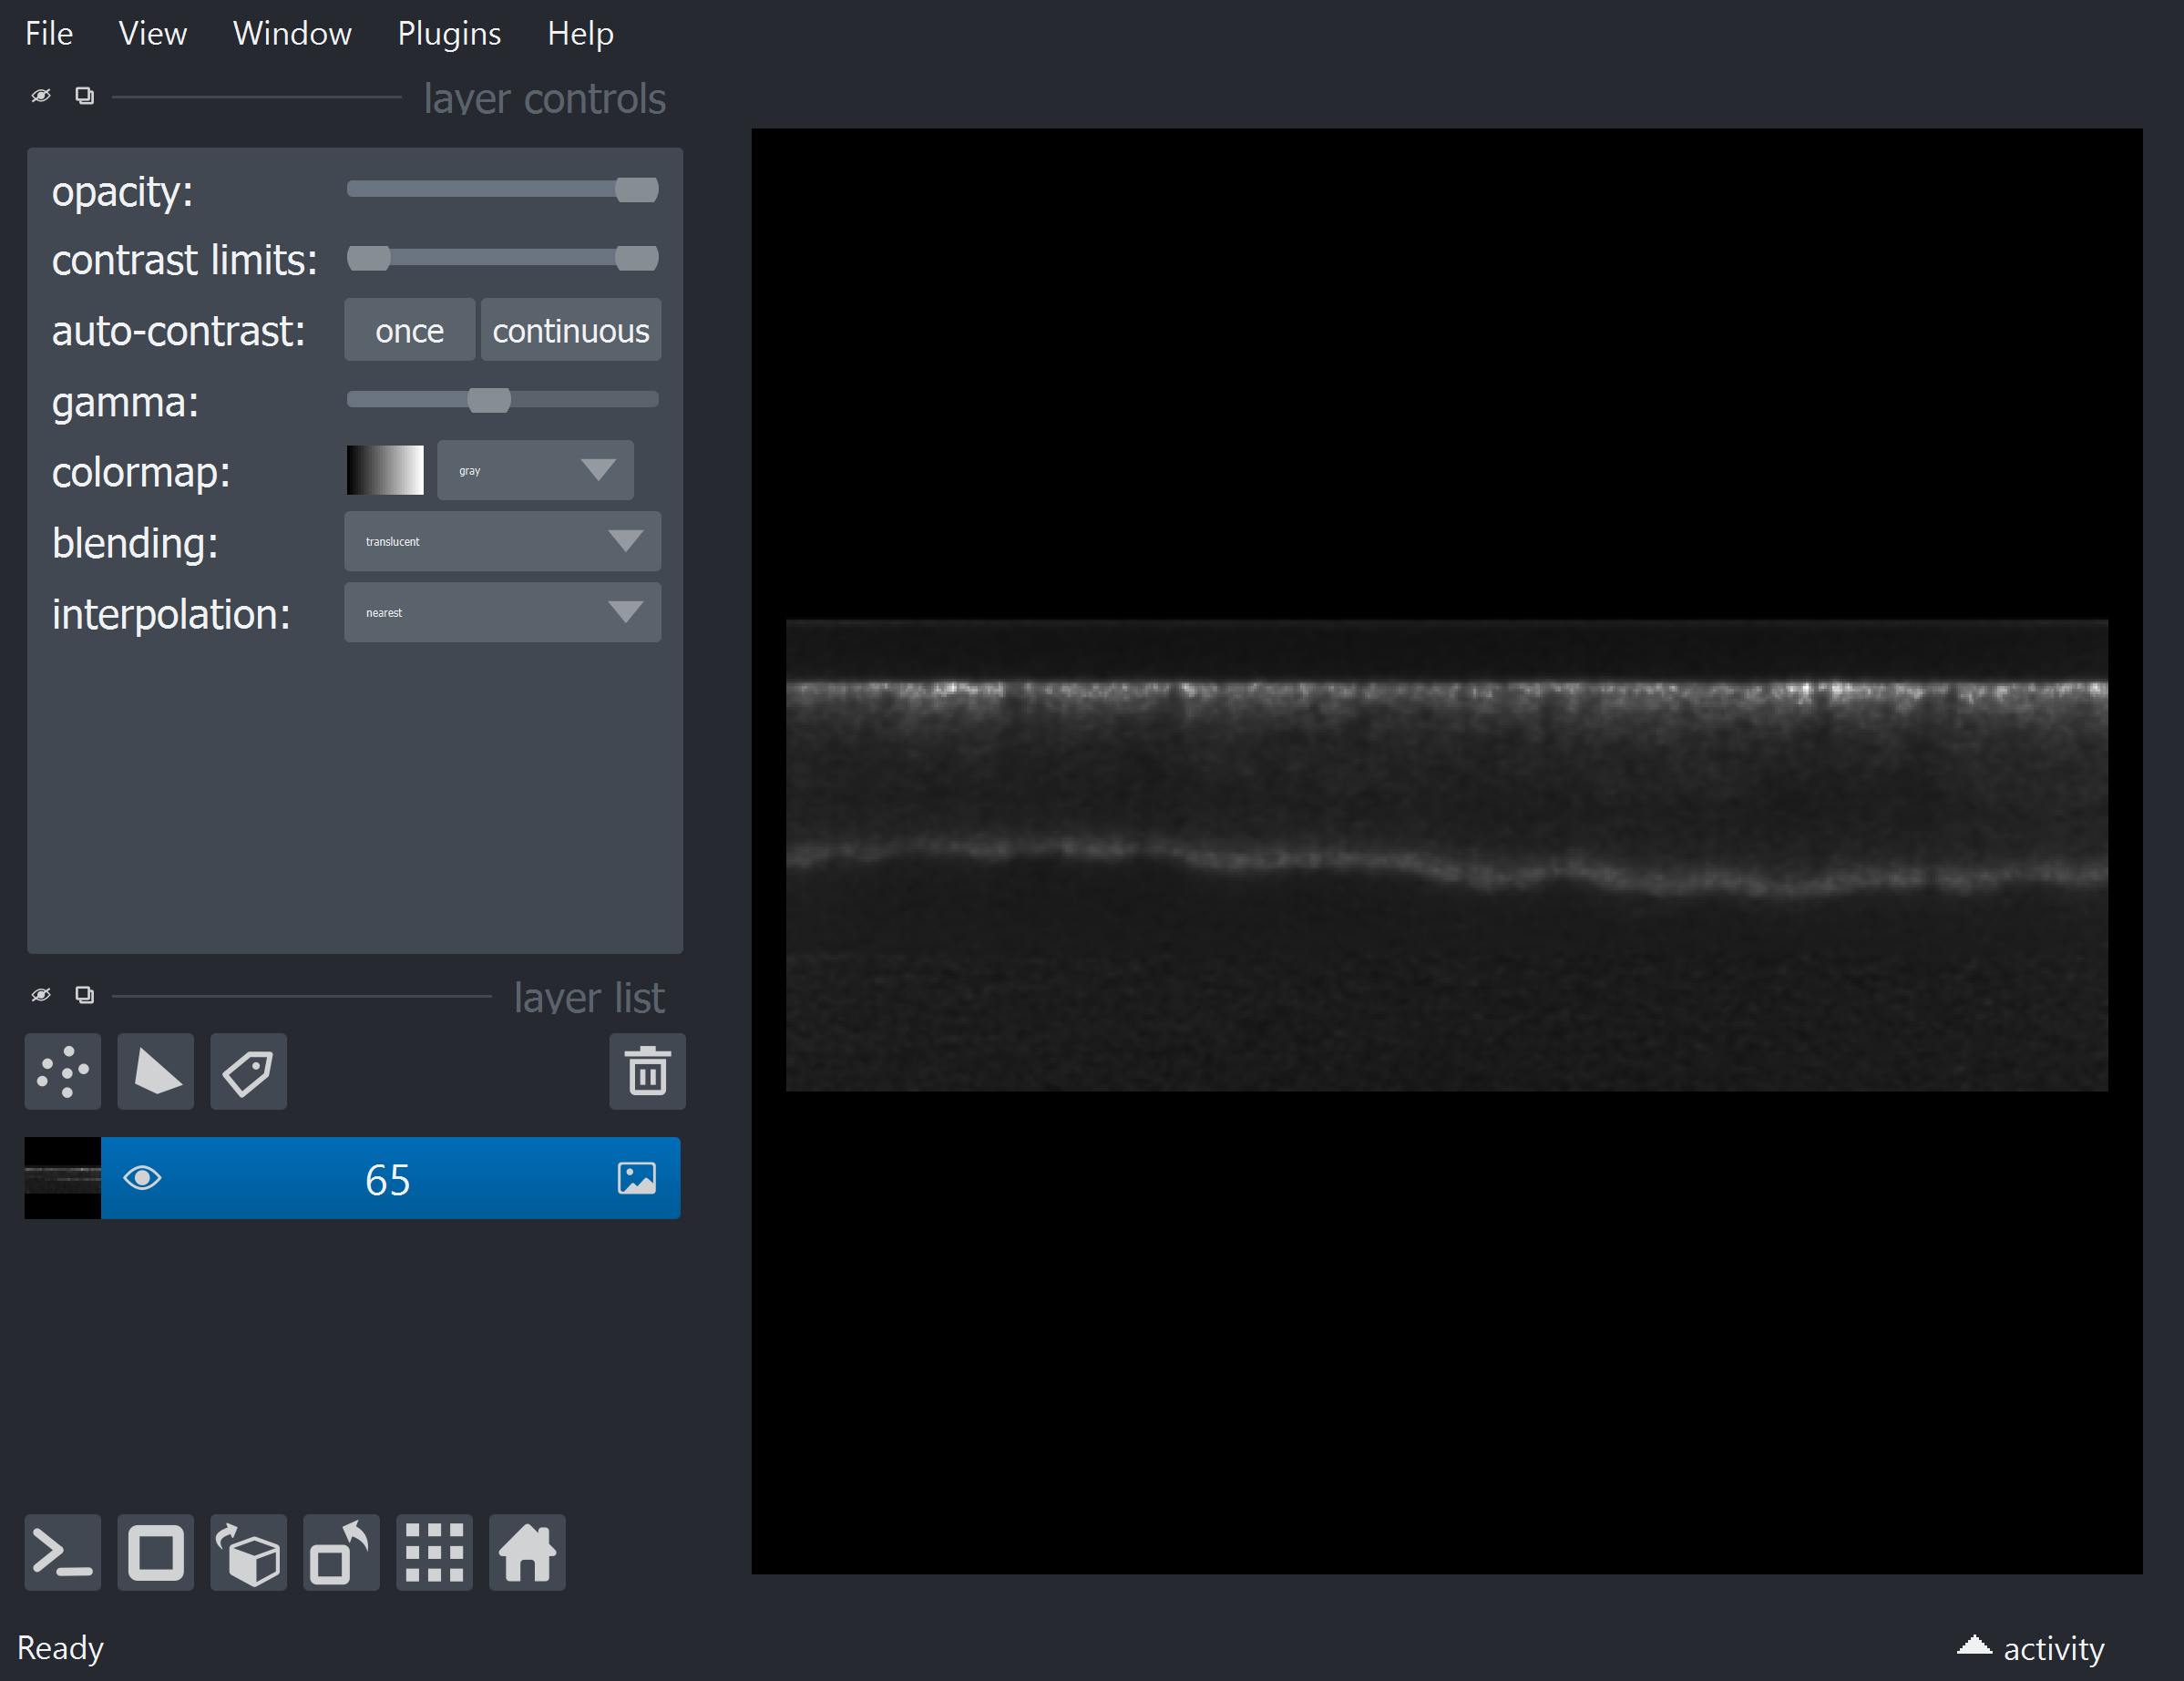

In [4]:
import napari
viewer = napari.Viewer()
image = gel[65,:,:,256]
viewer.add_image(image, name='65')
napari.utils.nbscreenshot(viewer)

In [20]:
t = 30
viewer.add_image(gel[t,:,:,256], name = 'gel %d'%t )
viewer.add_image(mask[t,:,:,256], name = 'mask %d'%t )


<Image layer 'mask 30 [2]' at 0x2c45a969a00>

In [5]:
from  concurrent.futures import ThreadPoolExecutor
gradient_table = np.zeros((len(gel), gel.shape[2]))
height_table = np.zeros((len(gel), gel.shape[2]))
height_deviation = np.zeros((len(gel), gel.shape[2]))

def x(t):
    print('proces %d starts'%t)
    #flat = gel[t].reshape(-1)[1:-1:10]
    # n, bins, patches = plt.hist(flat,cumulative=True,  density=True)
    #hist, bins = np.histogram(flat, density=True)
    #min_intensity = bins[2]

    max_intensity = 10000

    gel_time_point = gel[t]
    for i in range(gel_time_point.shape[1]):
        for j in range(gel_time_point.shape[2]):
            z_line = gel_time_point[:,i,j]
            min_intensity = filters.threshold_li(z_line)

            z_line[z_line < min_intensity] =0
            z_line[z_line>max_intensity] = 0
            z_line[np.bitwise_and(z_line>= min_intensity , z_line<= max_intensity)] =1
    plane = movie_structure.Vplane(gel_time_point[:,:,256], gel_time_point[:,:,256])
    height = plane.set_height()

    height_table[t] = height
    height_deviation[t] = height - np.nanmean(height)

    gradient_table[t] = np.gradient(height)
    print('proces %d ends'%t)
    return height

In [6]:

with ThreadPoolExecutor(max_workers=8) as e:
    for t in trange(len(gel)):
        e.submit(x,t)



  0%|          | 0/95 [00:00<?, ?it/s]

proces 0 starts
proces 1 starts
proces 2 starts
proces 3 starts
proces 4 starts
proces 5 starts
proces 6 starts
proces 7 starts


C:\Users\amityu\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:744: RuntimeWarning: divide by zero encountered in log
  / (np.log(mean_back) - np.log(mean_fore)))


proces 7 ends
proces 8 starts
proces 6 ends
proces 9 starts
proces 5 ends
proces 10 starts
proces 4 ends
proces 11 starts
proces 0 ends
proces 12 starts
proces 2 ends
proces 13 starts
proces 3 ends
proces 14 starts
proces 1 ends
proces 15 starts
proces 8 ends
proces 16 starts
proces 9 ends
proces 17 starts
proces 10 ends
proces 18 starts
proces 11 ends
proces 19 starts
proces 12 ends
proces 20 starts
proces 13 ends
proces 21 starts
proces 17 ends
proces 22 starts
proces 15 ends
proces 23 starts
proces 18 ends
proces 24 starts
proces 16 ends
proces 25 starts
proces 19 ends
proces 26 starts
proces 20 ends
proces 27 starts
proces 14 ends
proces 28 starts
proces 24 ends
proces 29 starts
proces 23 ends
proces 30 starts
proces 22 ends
proces 31 starts
proces 25 ends
proces 32 starts
proces 21 ends
proces 33 starts
proces 26 ends
proces 34 starts
proces 27 ends
proces 35 starts
proces 28 ends
proces 36 starts
proces 30 ends
proces 37 starts
proces 29 ends
proces 38 starts
proces 31 ends
proce

In [21]:
for t in trange(len(gel)):
    x(t)

np.save(MOVIE_PATH +'tmp/gradient_table.npy',gradient_table)
np.save(MOVIE_PATH +'tmp/height_table.npy', height_table)
np.save(MOVIE_PATH +'tmp/height_deviation.npy', height_deviation )


  0%|          | 0/95 [00:00<?, ?it/s]

proces 0 starts


C:\Users\amityu\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:744: RuntimeWarning: divide by zero encountered in log
  / (np.log(mean_back) - np.log(mean_fore)))


proces 0 ends
proces 1 starts
proces 1 ends
proces 2 starts
proces 2 ends
proces 3 starts
proces 3 ends
proces 4 starts
proces 4 ends
proces 5 starts
proces 5 ends
proces 6 starts
proces 6 ends
proces 7 starts
proces 7 ends
proces 8 starts
proces 8 ends
proces 9 starts
proces 9 ends
proces 10 starts
proces 10 ends
proces 11 starts
proces 11 ends
proces 12 starts
proces 12 ends
proces 13 starts
proces 13 ends
proces 14 starts
proces 14 ends
proces 15 starts
proces 15 ends
proces 16 starts
proces 16 ends
proces 17 starts
proces 17 ends
proces 18 starts
proces 18 ends
proces 19 starts
proces 19 ends
proces 20 starts
proces 20 ends
proces 21 starts
proces 21 ends
proces 22 starts
proces 22 ends
proces 23 starts
proces 23 ends
proces 24 starts
proces 24 ends
proces 25 starts
proces 25 ends
proces 26 starts
proces 26 ends
proces 27 starts
proces 27 ends
proces 28 starts
proces 28 ends
proces 29 starts
proces 29 ends
proces 30 starts
proces 30 ends
proces 31 starts
proces 31 ends
proces 32 st

In [8]:
np.save (MOVIE_PATH +'tmp/mask.npy',gel)


In [9]:
gradient_table = np.zeros((len(gel), gel.shape[2]))
height_table = np.zeros((len(gel), gel.shape[2]))
height_deviation = np.zeros((len(gel), gel.shape[2]))

In [10]:
'''x_index = 320

for tp in tqdm(gel):
    plane = movie_structure.Vplane(tp[:,:,x_index], tp[:,:,x_index])
    height = plane.set_height()

    height_table[t] = height
    height_deviation[t] = height - np.nanmean(height)

    gradient_table[t] = np.gradient(height)
'''

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
np.save(MOVIE_PATH + 'tmp/mask.npy', gel)

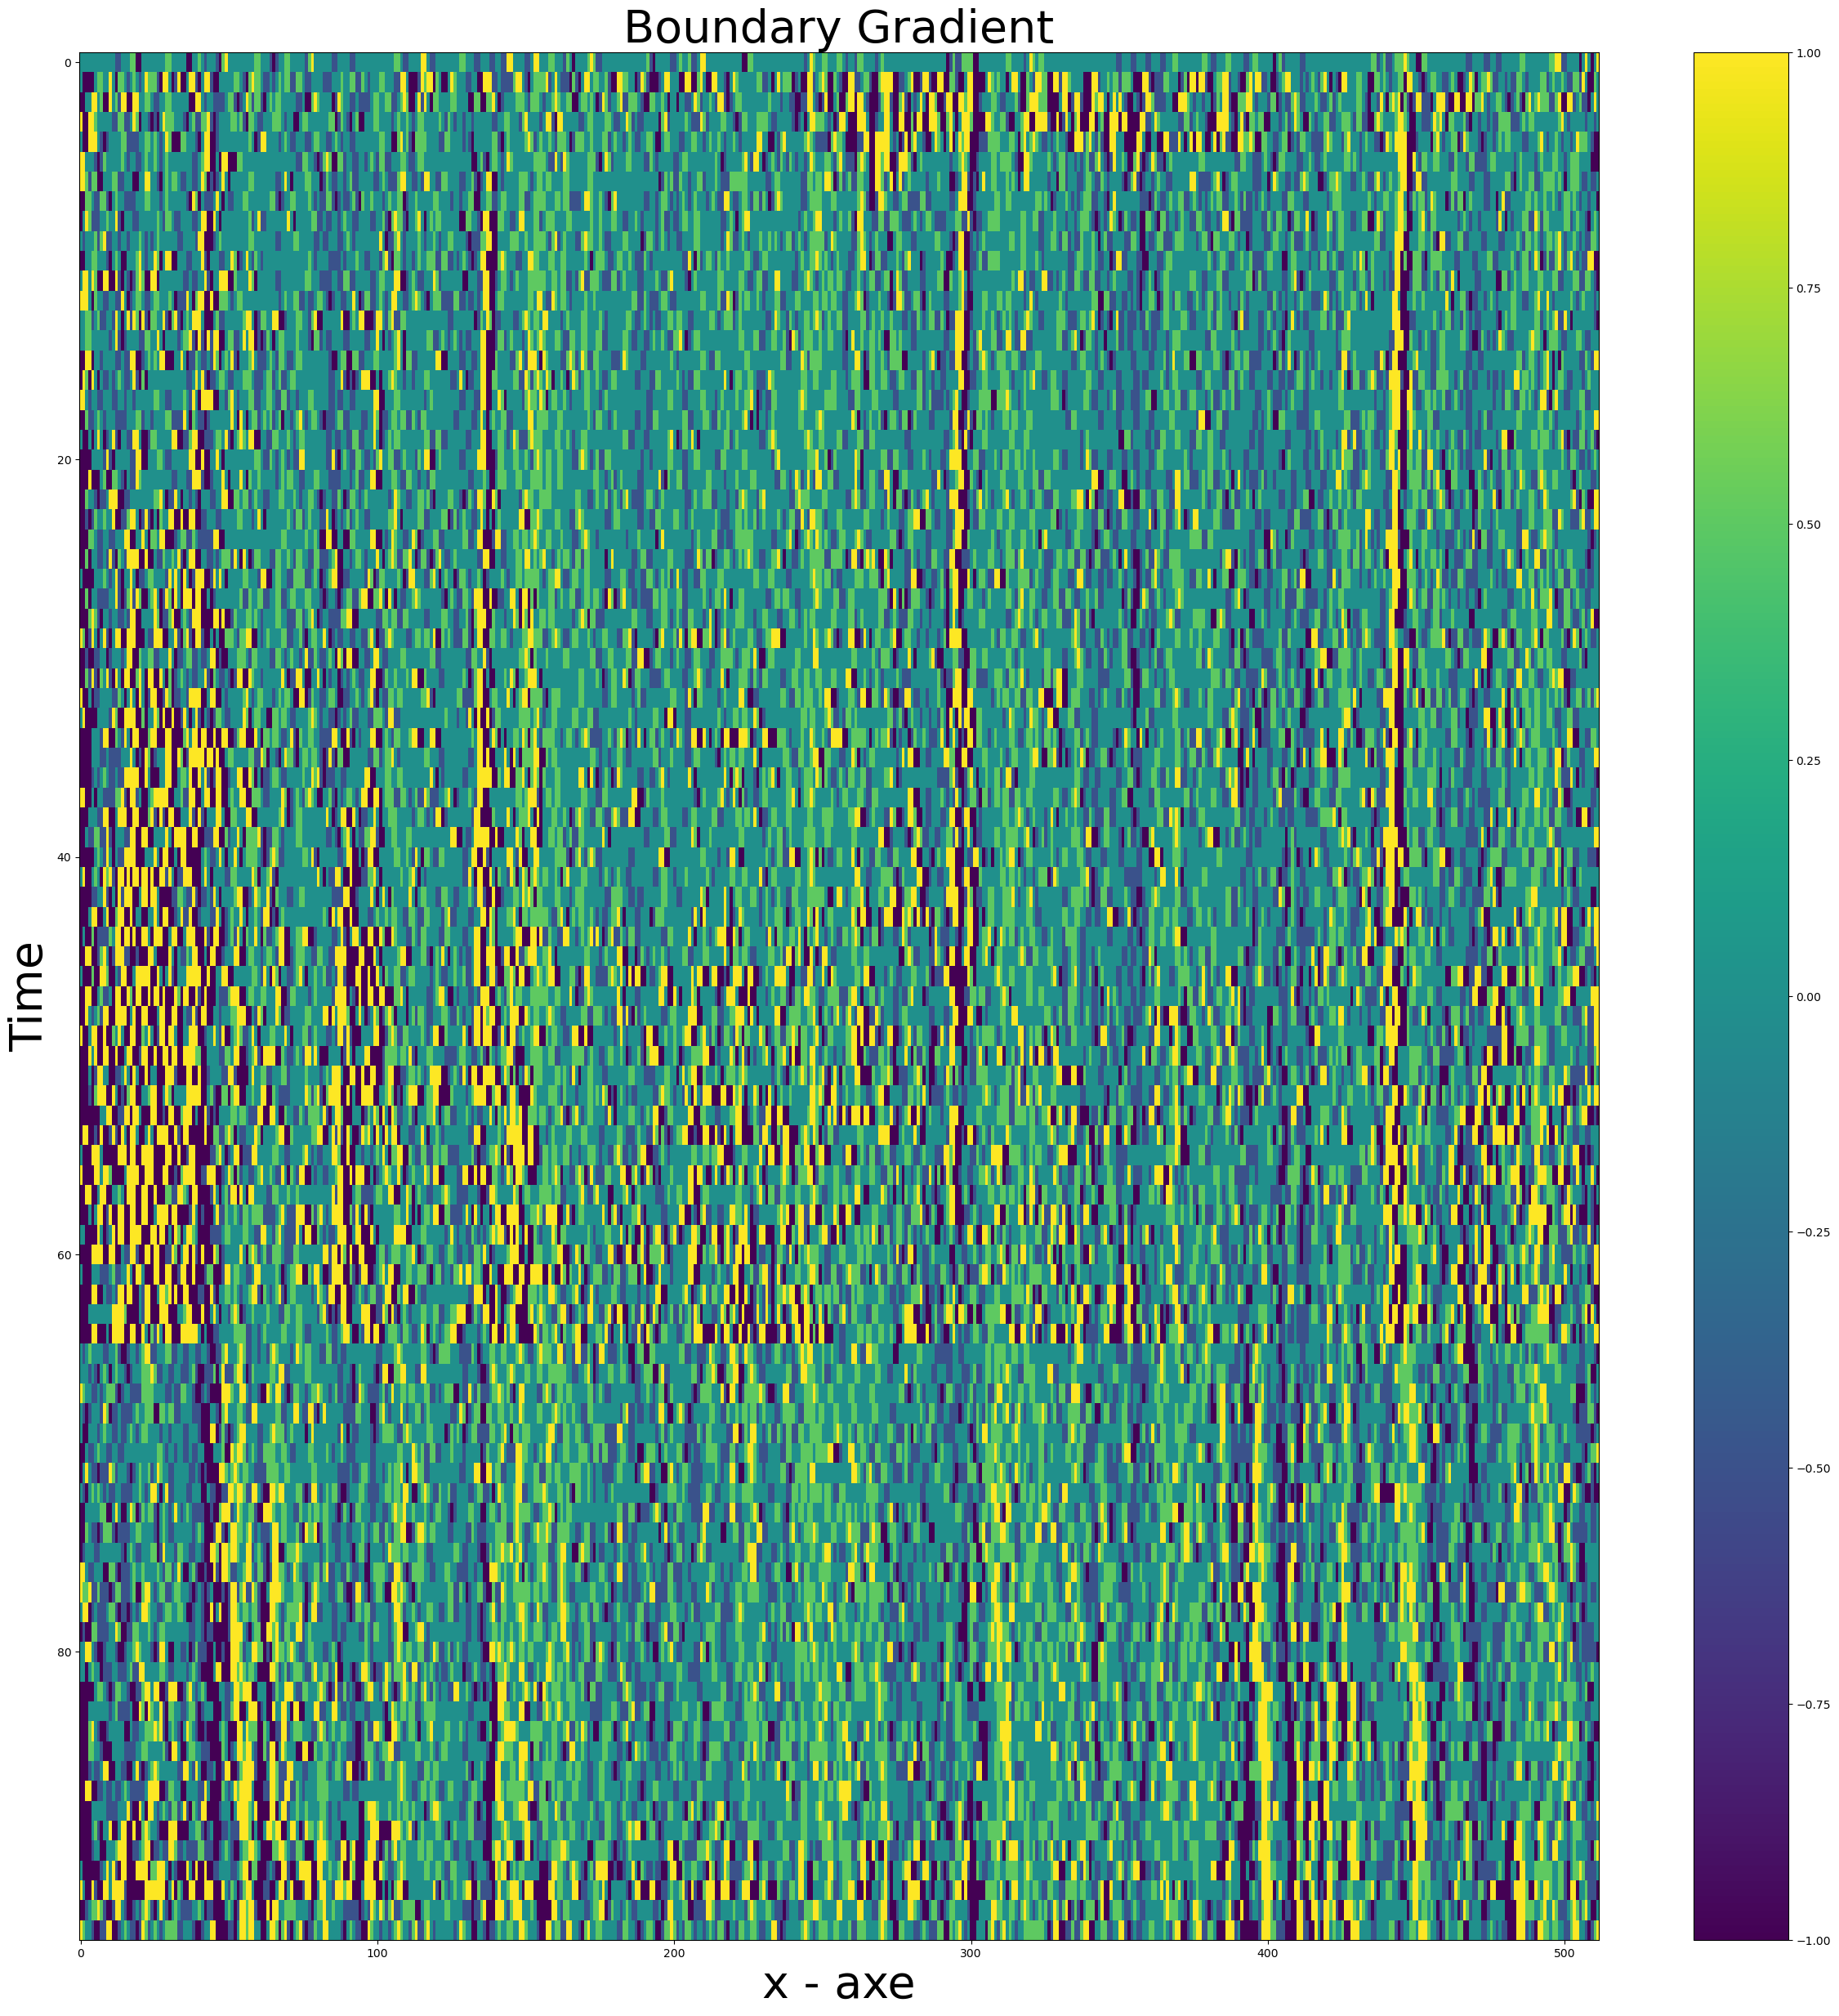

In [22]:
#gradient_table = gradient_table[range(len(gradient_table)-1,0,-1)]
plt.figure(figsize=(30,30))
plt.imshow(gradient_table, vmin= -1, vmax =1, aspect = 'auto')
plt.xlabel('x - axe',  fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Boundary Gradient', fontsize = 40)
plt.colorbar()
plt.show()

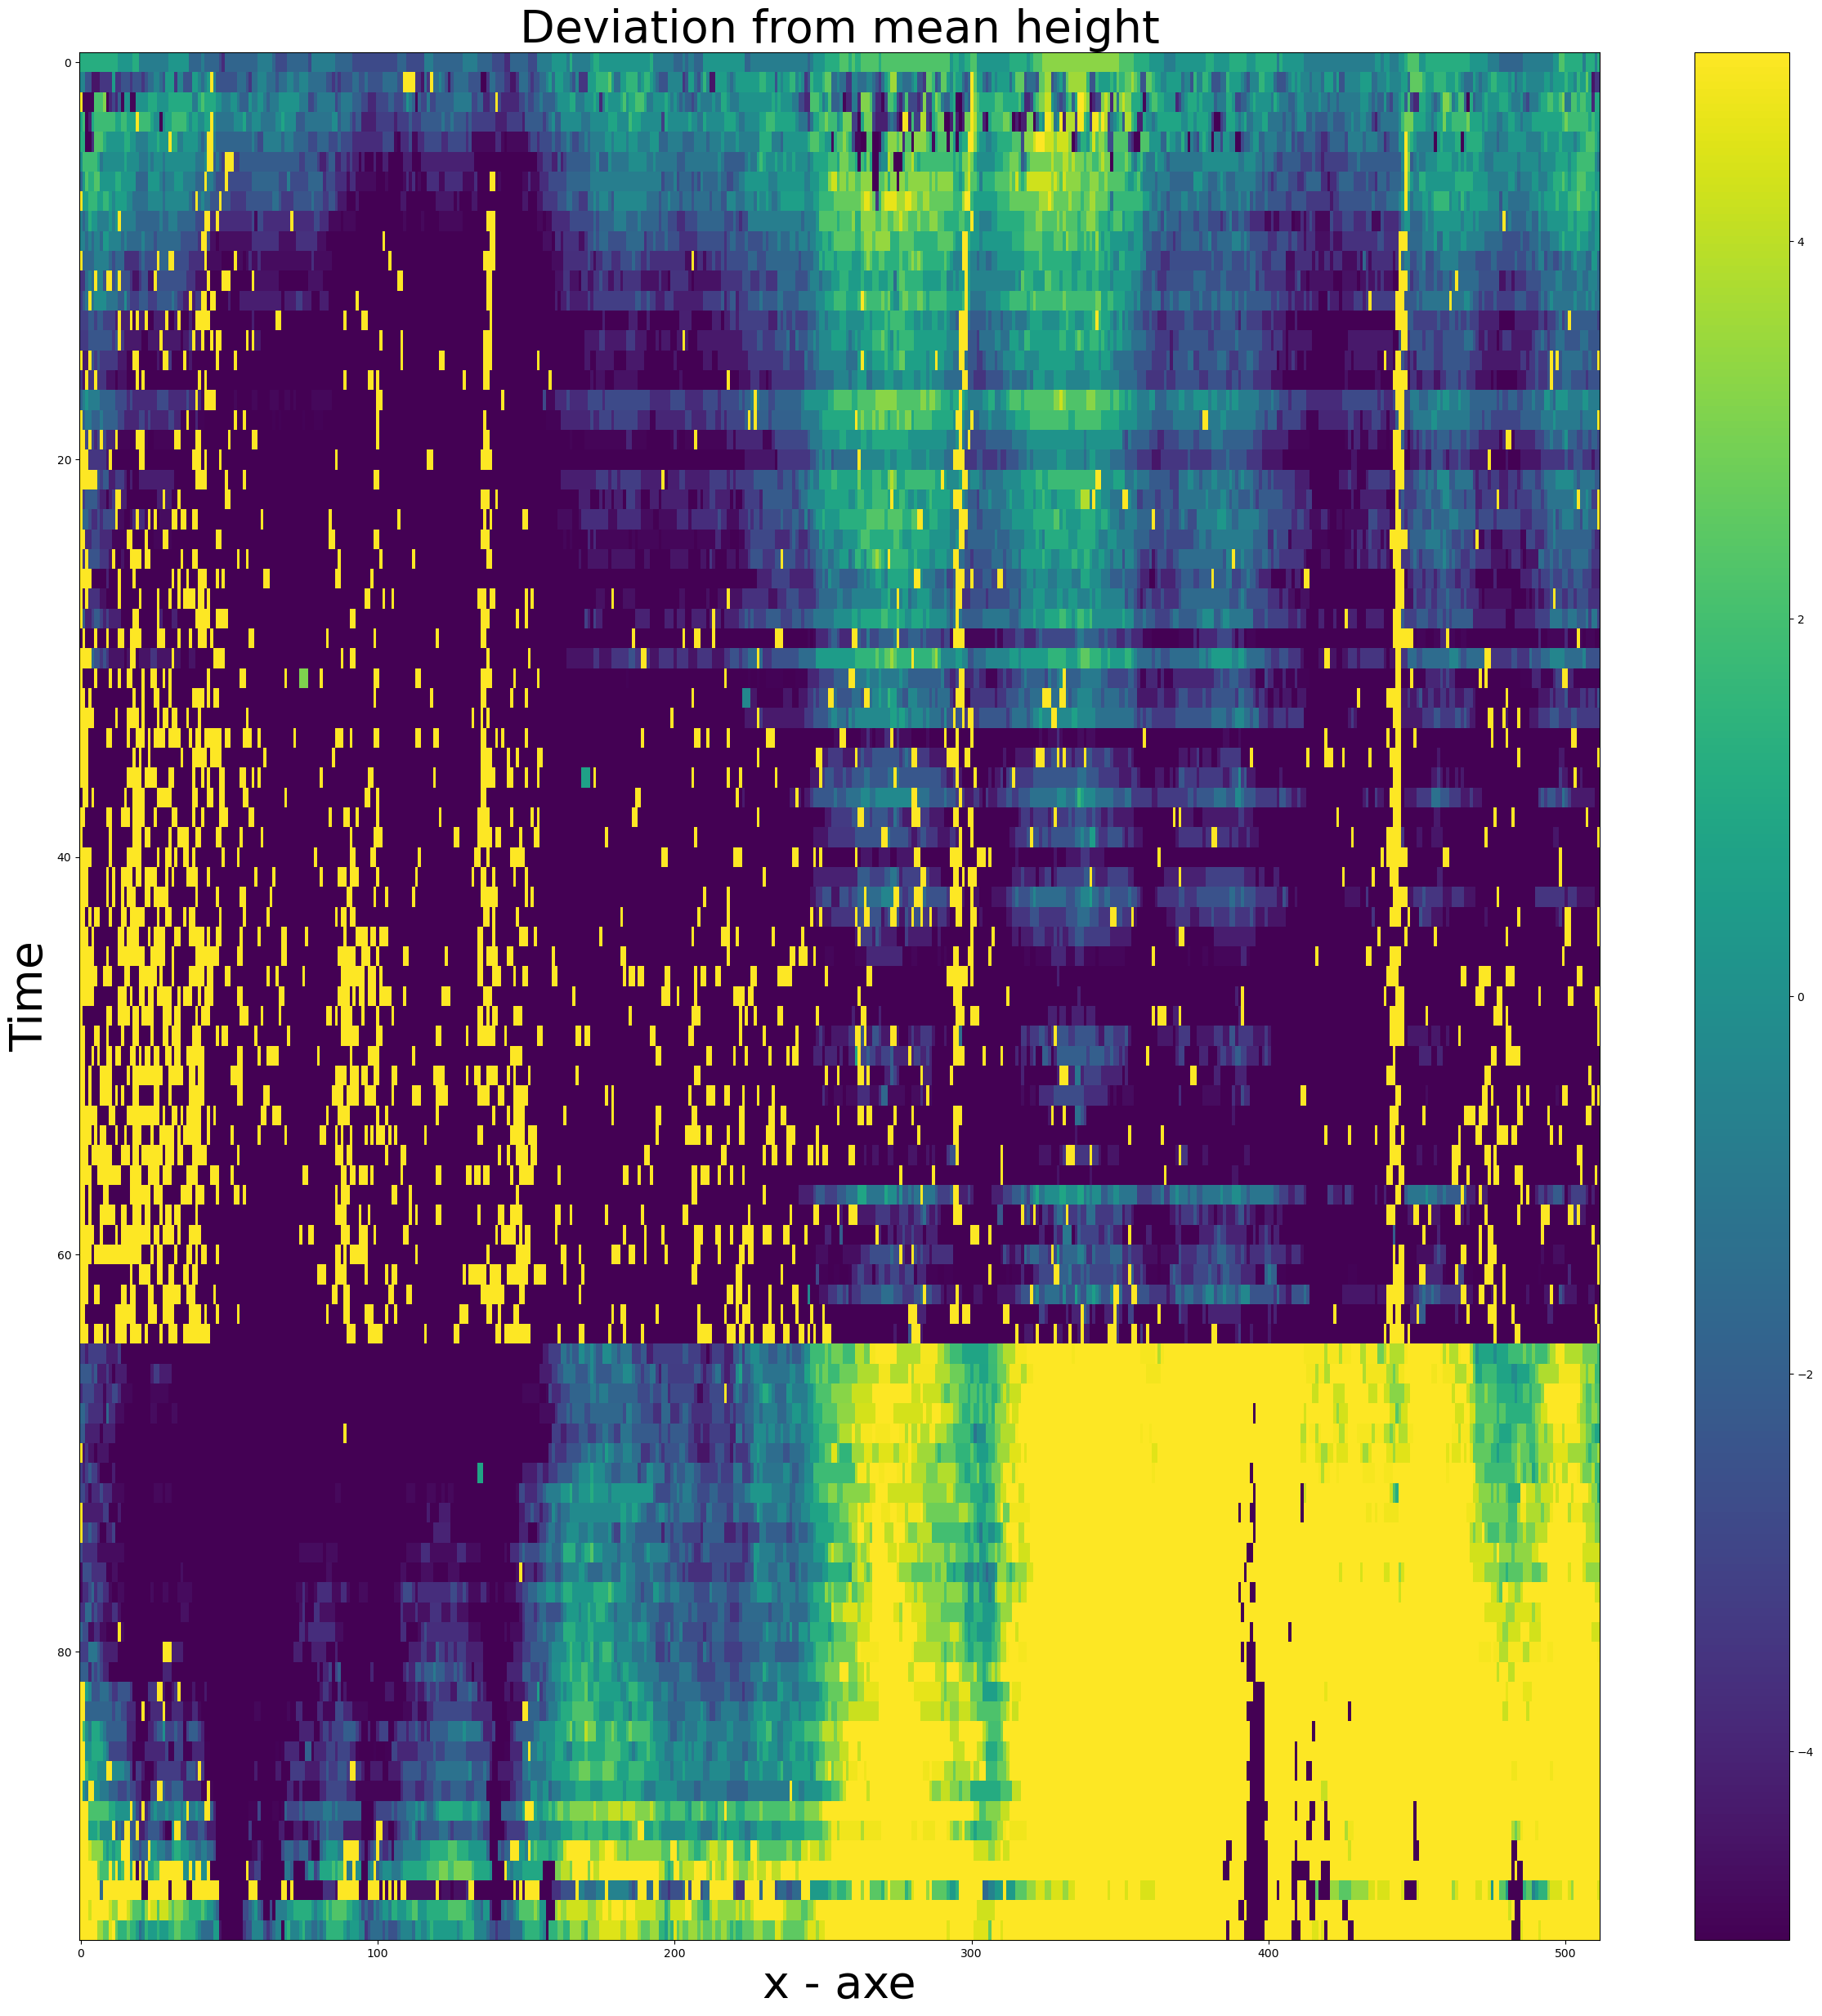

In [23]:
plt.figure(figsize=(30,30))
plt.imshow(height_deviation, vmin = -5, vmax =5 ,aspect = 'auto')
plt.xlabel('x - axe',fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Deviation from mean height',fontsize = 40)
plt.colorbar()
plt.show()



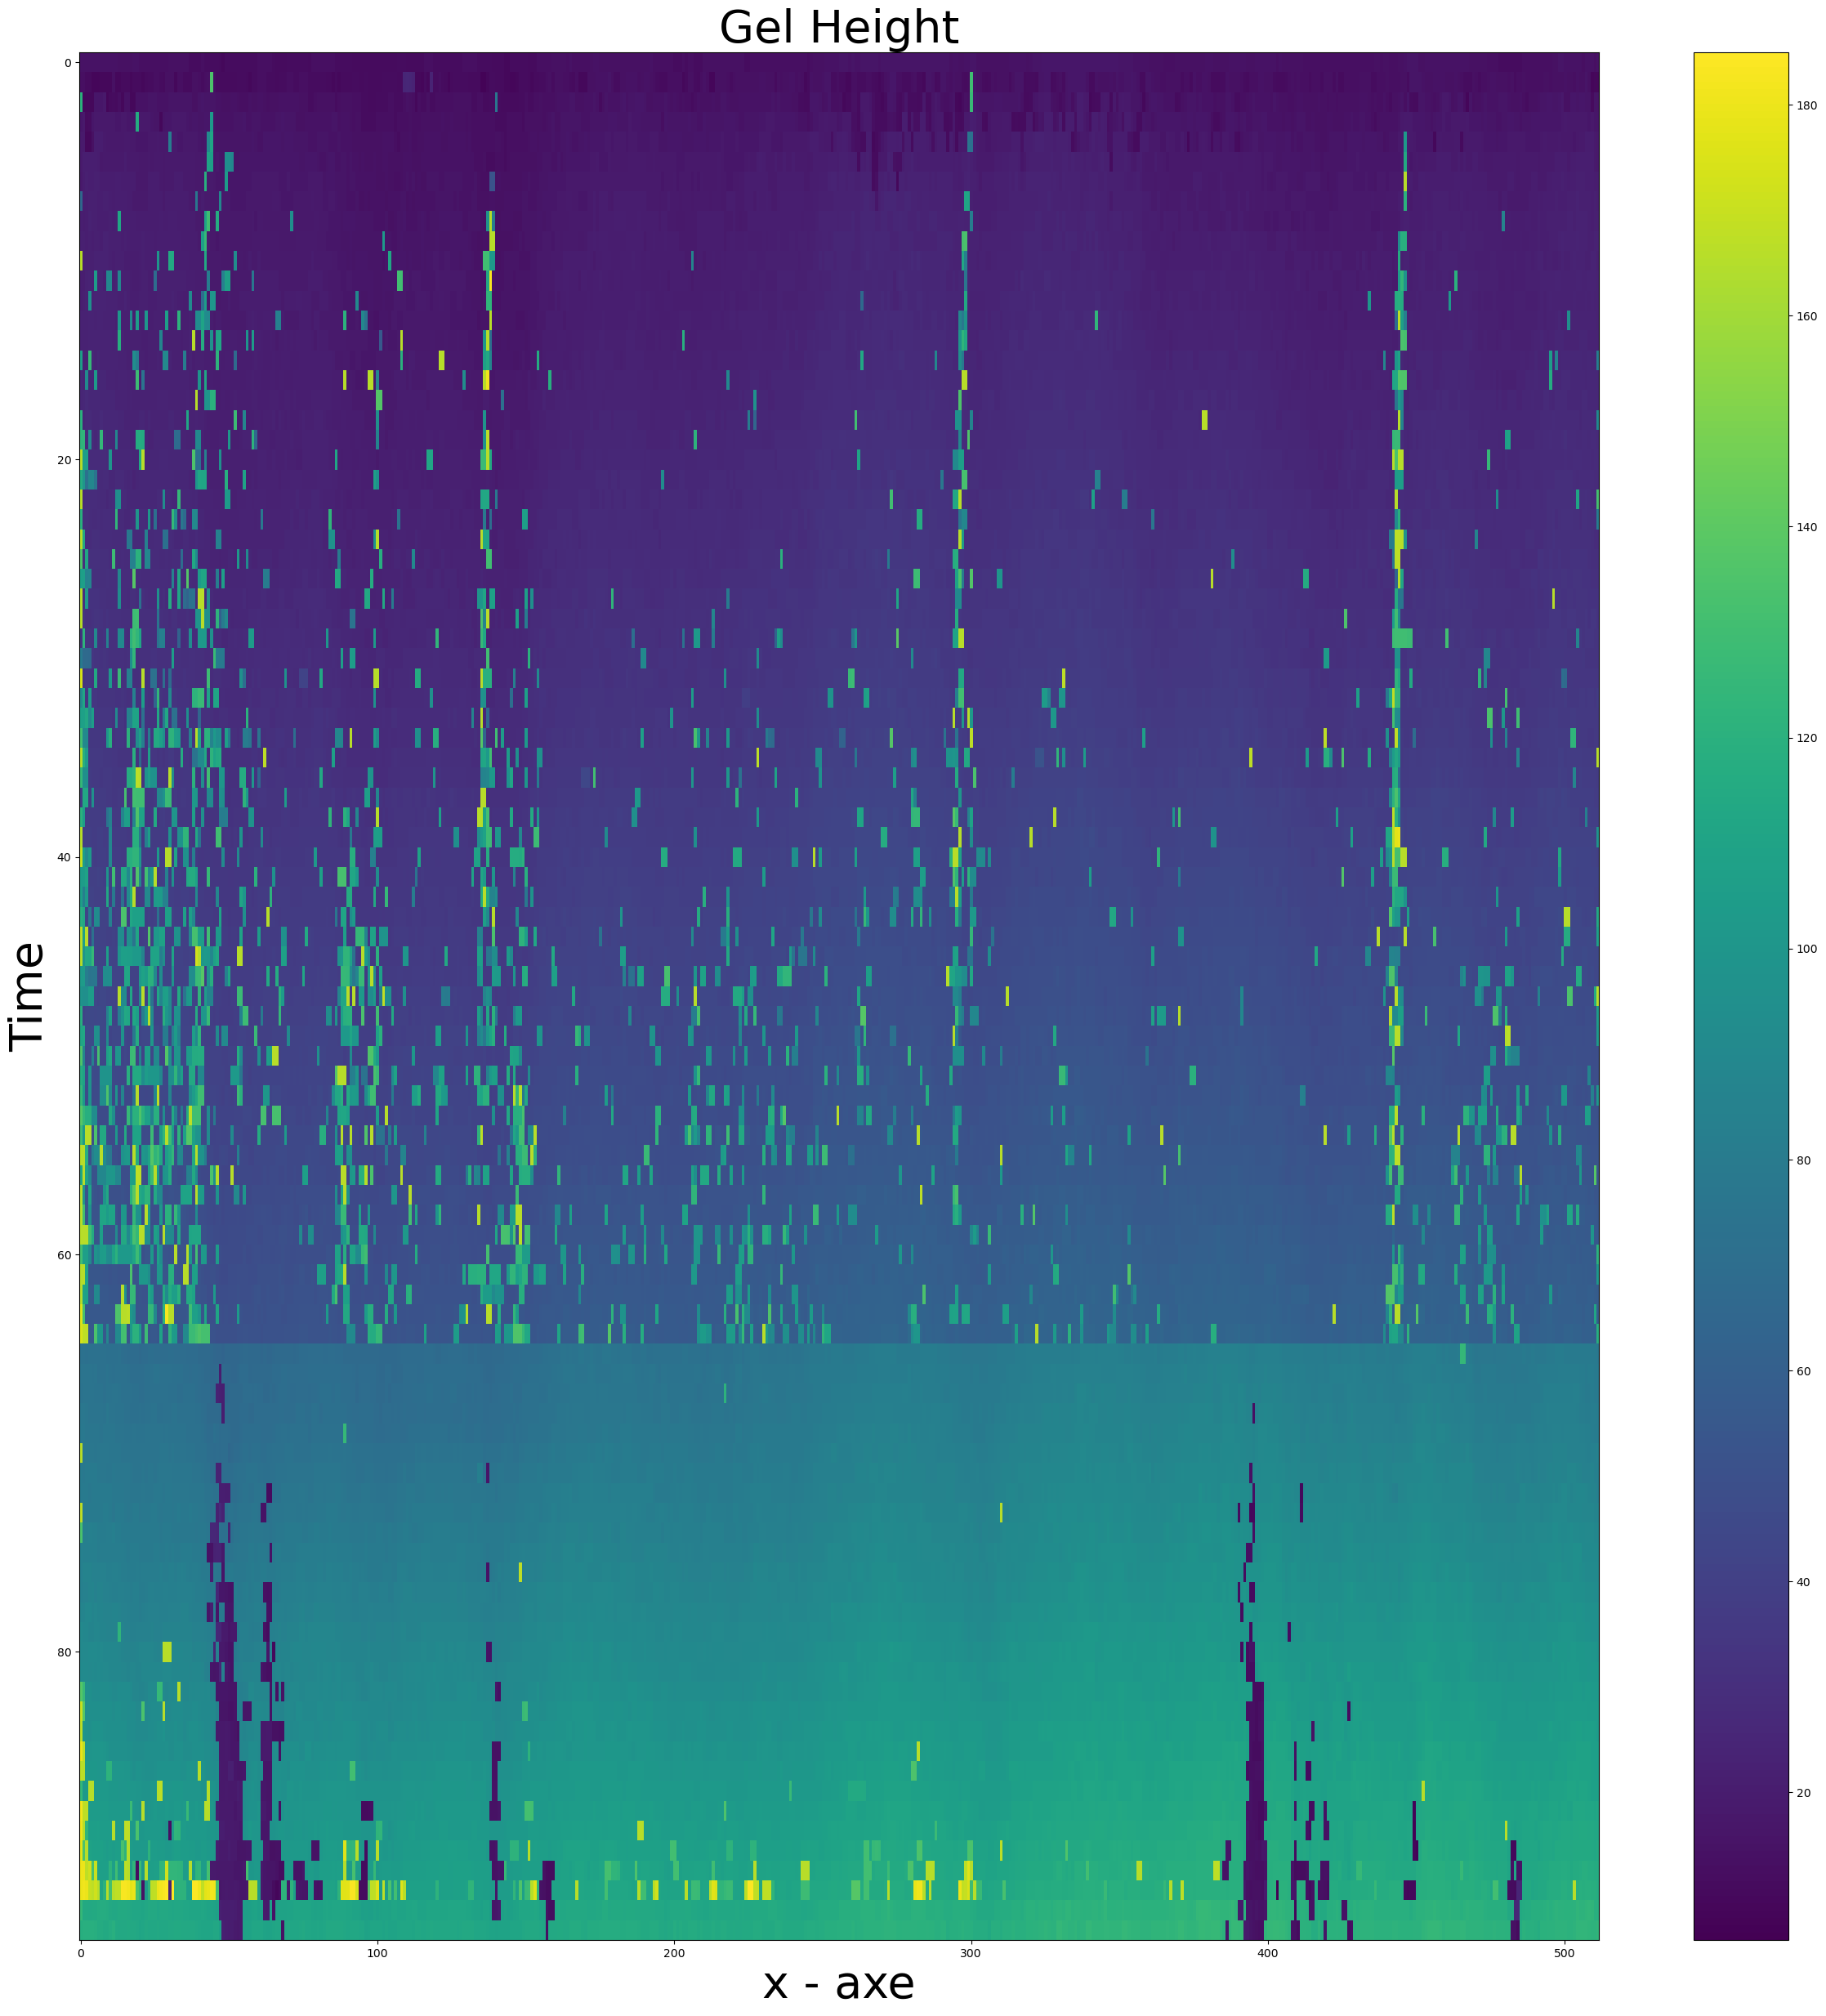

In [24]:
plt.figure(figsize=(30,30))
plt.imshow(height_table, aspect = 'auto')
plt.xlabel('x - axe',fontsize = 40)
plt.ylabel('Time', fontsize = 40)
plt.title('Gel Height',fontsize = 40)
plt.colorbar()
plt.show()


  0%|          | 0/95 [00:00<?, ?it/s]

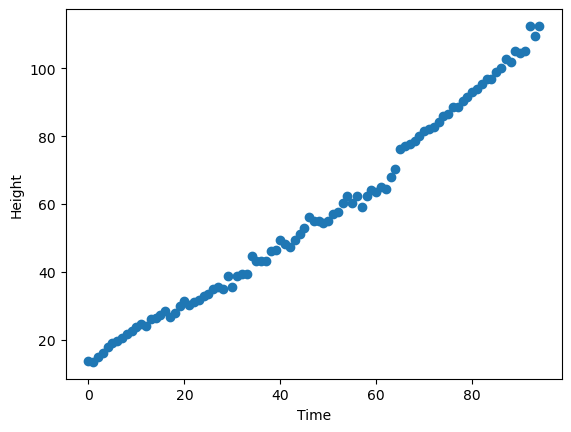

In [25]:
mean_height = np.zeros(len(height_table))
for t in trange(len(height_table)):
    mean_height[t] = np.nanmean(height_table[t])
plt.scatter(range(len(mean_height)),mean_height)
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

In [38]:
x1, y1 = (0,40)
x2,y2 = (90,140)

a = (y2-y1)/(x2-x1)
y1 = a

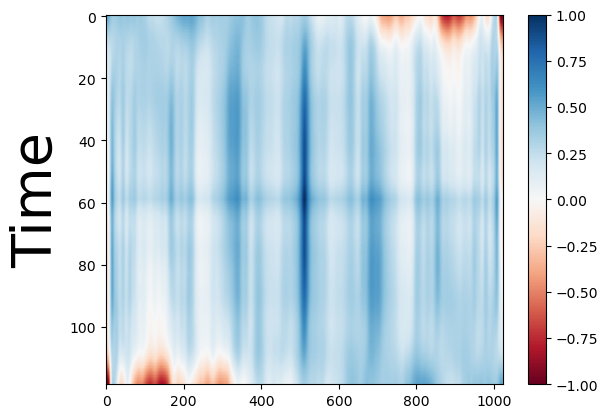

In [68]:
auto = iac.spatial_autocorr(gaussian(gel[:,20,:,256],3), range(160),range(512))
norm_auto = ((auto[0] - auto[0].min())/(auto[0].max() -auto[0].min())-0.5)*2
plt.imshow(norm_auto ,  cmap= cm.get_cmap('RdBu'),aspect = 'auto')
plt.ylabel('Time', fontsize = 40)
plt.colorbar()
plt.show()

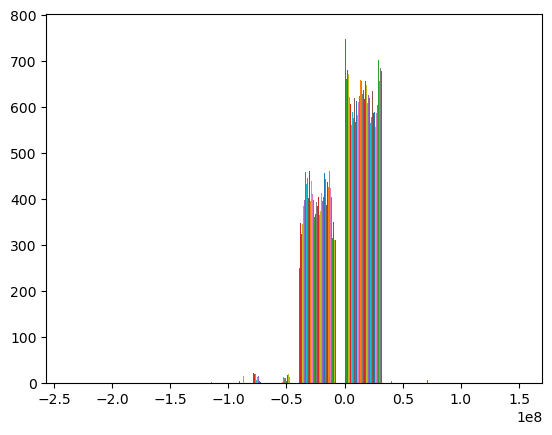

In [7]:
plt.hist(auto[0])
plt.show()

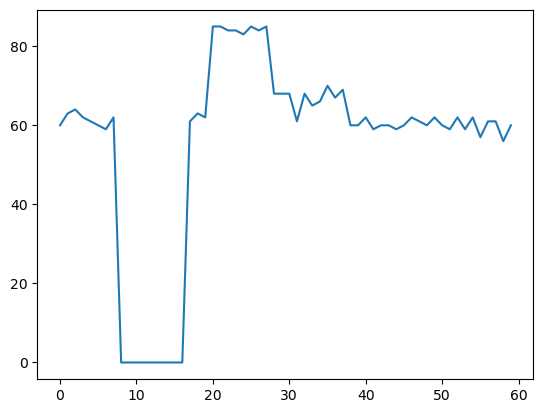

In [16]:
mean_list = []
for t in range(len(gel)):
    mean_list.append((gel[t].min()))
plt.plot(mean_list)
plt.show()

In [81]:
import libpysal

import numpy as np

#np.random.seed(10)
image = gel[20,20,:,:].astype('uint16')
def autocorr(image):
    w = libpysal.weights.lat2W(*image.shape)

    y = image.reshape(-1,1)

    y = np.copy(y)
    from esda.moran import Moran_Local

    lm = Moran_Local(y, w, transformation = "r", permutations = 99)
    return lm.Is.reshape(*image.shape)


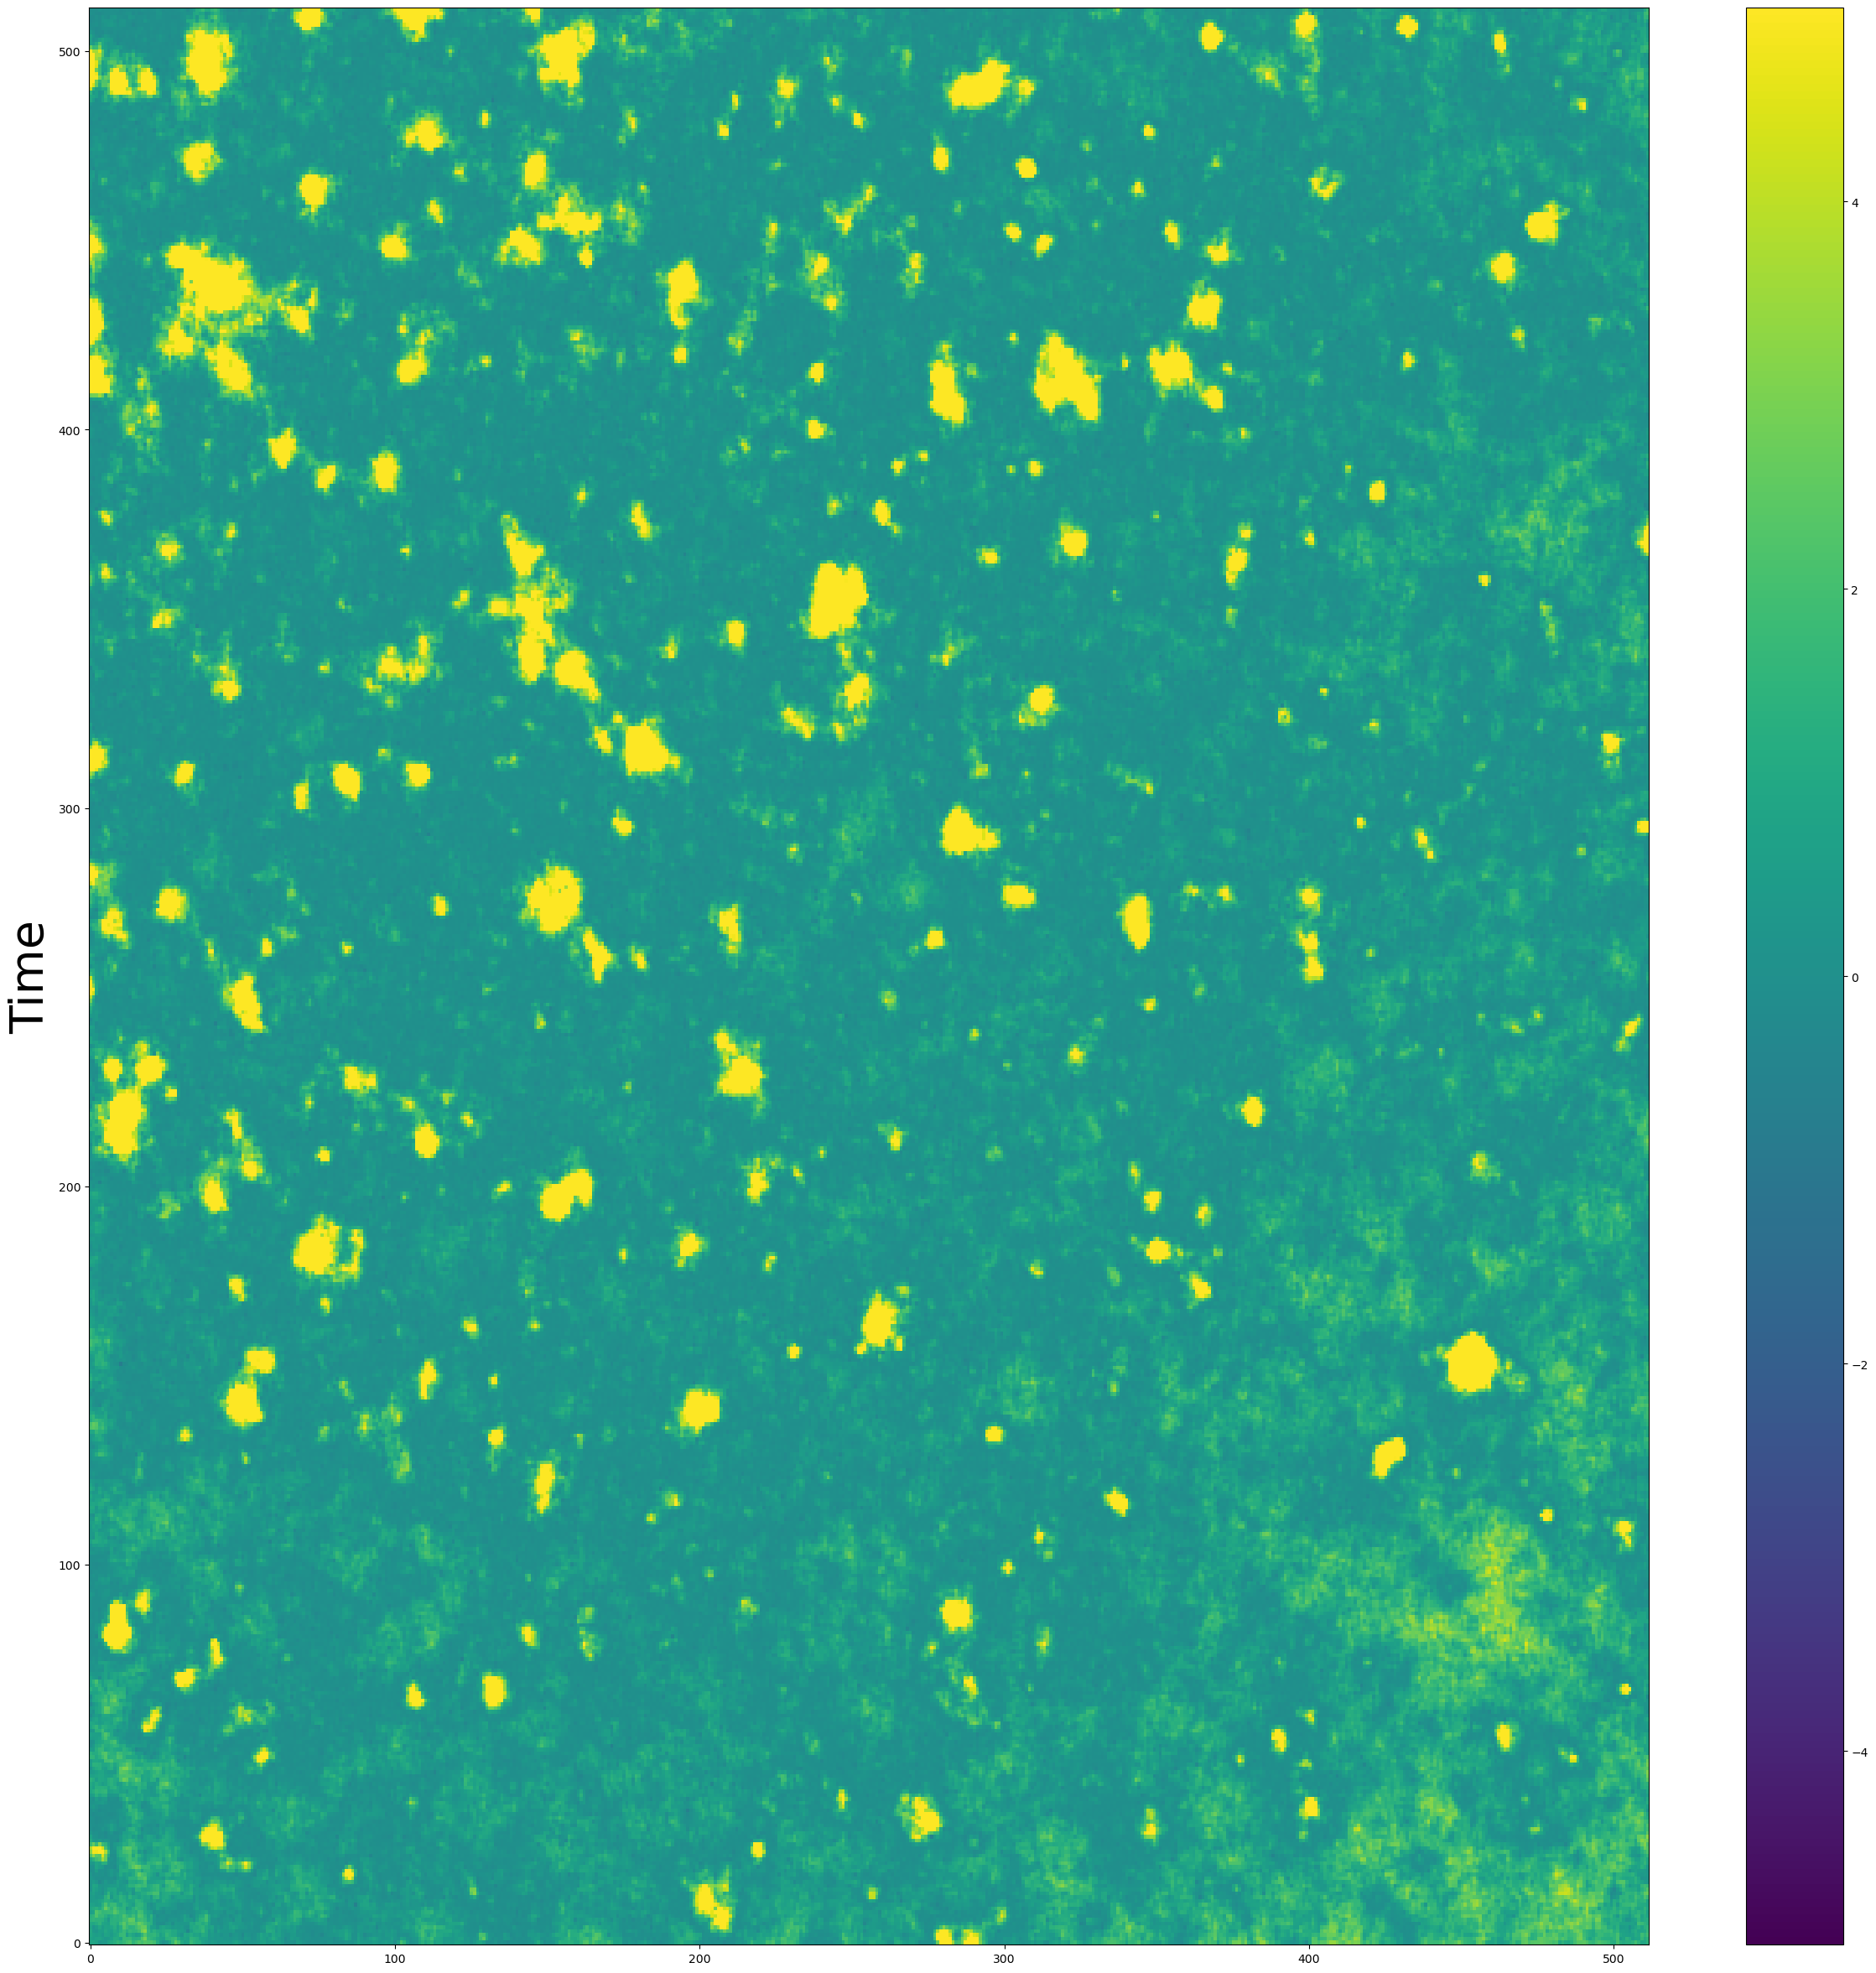

In [82]:
image = gel[20,20,:,:].astype('uint16')
output_image = autocorr(image)

plt.figure(figsize=(30,30))
plt.imshow(output_image, vmin =-5, vmax=5, aspect='auto',origin='lower')
plt.ylabel('Time',fontsize = 40)
plt.colorbar()
plt.show()


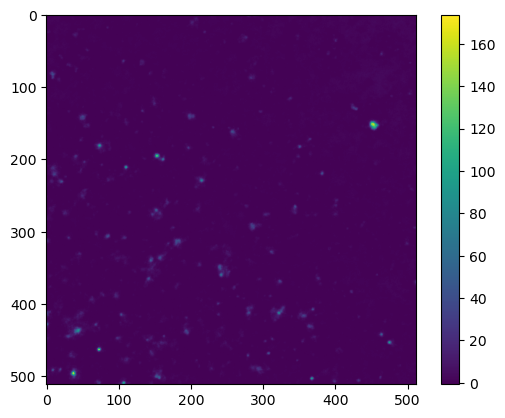

In [72]:
output_image = lm.Is.reshape(*image.shape)
plt.imshow(output_image)
plt.colorbar()
plt.show()


In [76]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pl

image = output_image.copy()
def power_spectrum(image):
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                         statistic = "mean",
                                         bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    return (kvals,Abins)


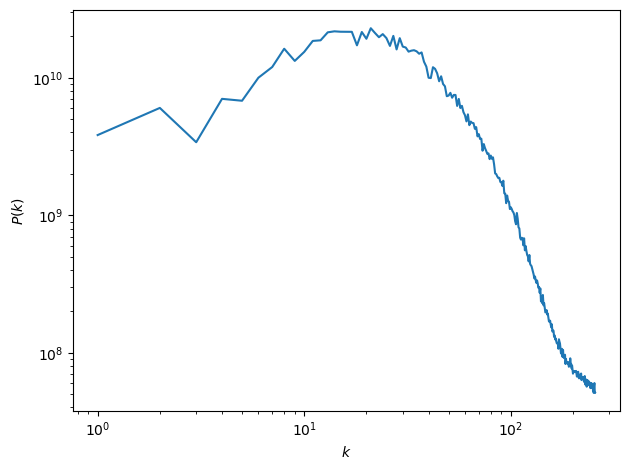

In [77]:
image = output_image.copy()
kvals, Abins =  power_spectrum(image)

pl.loglog(kvals, Abins)
pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

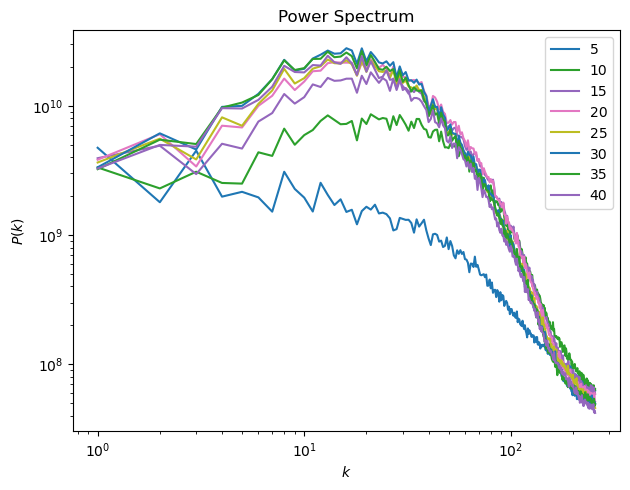

In [98]:
kvals_ls = []
abins_ls = []
for t in trange(5,41,5):
    image = gel[t,20,:,:].astype('uint16')
    output_image = autocorr(image)
    image = output_image.copy()
    kvals, Abins =  power_spectrum(image)
    kvals_ls.append(kvals)
    abins_ls.append(Abins)

    pl.loglog(kvals, Abins, label=str(t))
    pl.xlabel("$k$")
    pl.ylabel("$P(k)$")
    pl.tight_layout()
    pl.loglog(kvals, Abins, ls="None")

df = pd.DataFrame(columns=['kval','abins'])
df['kval'] = kvals_ls
df['abins'] = abins_ls
df.to_csv(GRAPH_PATH + 'spectrum/spectrum.csv')
plt.title('Power Spectrum')
plt.legend()
plt.show()

ValueError: <matplotlib.colors.ListedColormap object at 0x000001A3D4158E50> is not a valid value for color

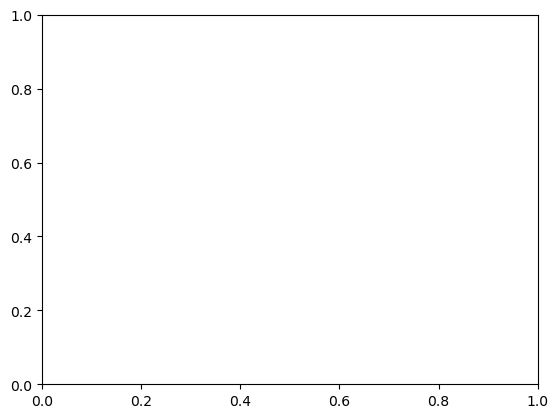

In [93]:
#plt.imshow(image, cmap='Set1')
plt.plot(np.arange(10), np.arange(10)/10, color = cm.get_cmap('Set1'))
plt.show()

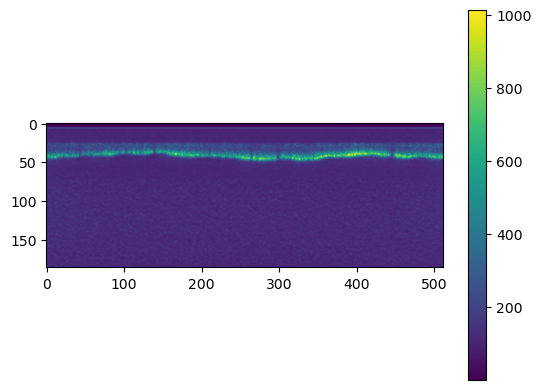

In [25]:
zy = gel[5][:,:,256]
plt.imshow(zy)
plt.colorbar()
plt.show()


(array([  6.,   1., 159.,   5.,   8.,   1.,   2.,   2.,   0.,   2.]),
 array([6.2928256e-03, 5.0926228e+01, 1.0184616e+02, 1.5276610e+02,
        2.0368602e+02, 2.5460596e+02, 3.0552588e+02, 3.5644583e+02,
        4.0736575e+02, 4.5828571e+02, 5.0920563e+02], dtype=float32),
 <BarContainer object of 10 artists>)

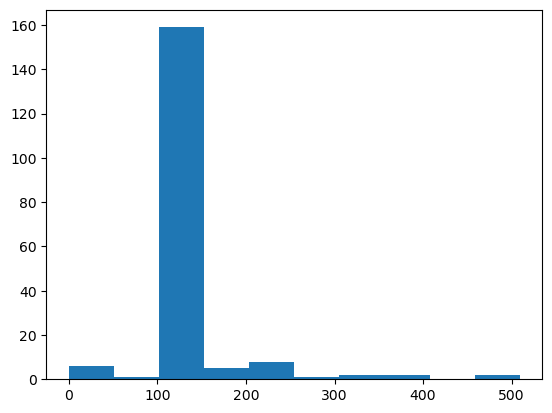

In [26]:
plt.hist(zy[:,40])

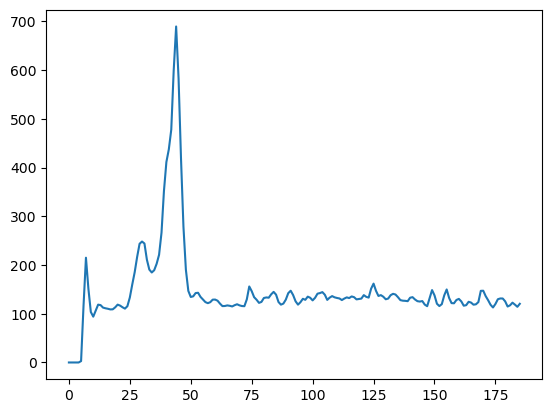

In [30]:
plt.plot(zy[:,10])
plt.show()

In [36]:
from skimage import filters
filters.threshold_li(zy[25:,10])

201.9678

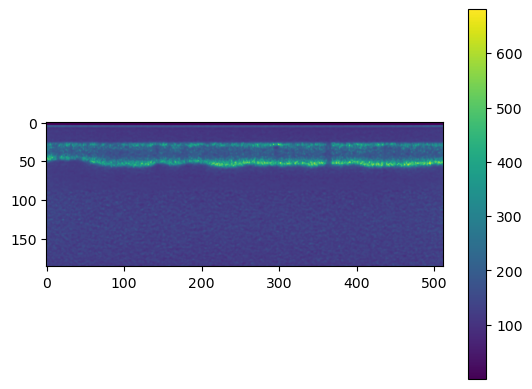

In [22]:
zy = gel[20][:,:,444]
plt.imshow(zy)
plt.colorbar()
plt.show()


(array([ 5.,  0.,  0., 80., 76.,  3.,  9.,  7.,  3.,  3.]),
 array([6.33655116e-03, 3.12319050e+01, 6.24574738e+01, 9.36830444e+01,
        1.24908615e+02, 1.56134186e+02, 1.87359756e+02, 2.18585312e+02,
        2.49810883e+02, 2.81036469e+02, 3.12262024e+02], dtype=float32),
 <BarContainer object of 10 artists>)

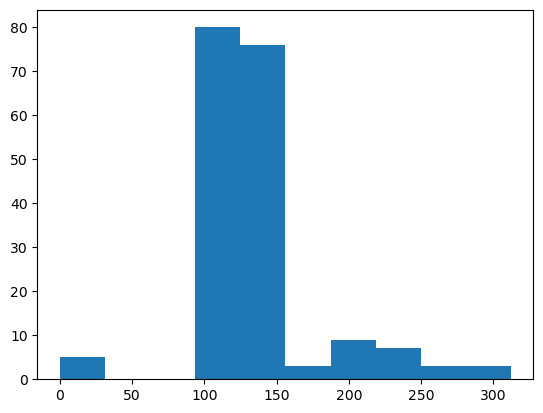

In [23]:
plt.hist(zy[:,40])


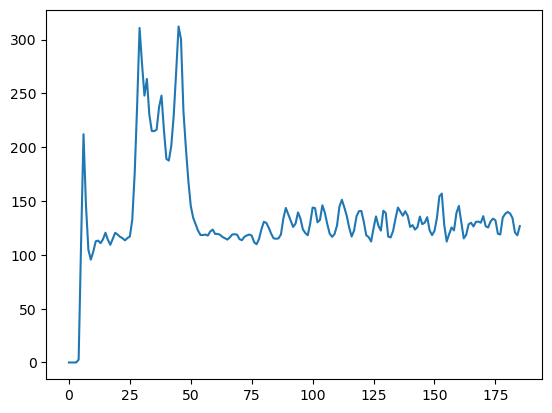

In [24]:
plt.plot(zy[:,40])
plt.show()

In [8]:
h = np.zeros((len(gel), gel.shape[2], gel.shape[3]))


def p(time):
    tp = movie_structure.TimePoint(gel[time])
    h[time] = tp.set_height()

with ThreadPoolExecutor() as e:
    for t in trange(len(gel)):
        e.submit(p,t)



  0%|          | 0/95 [00:00<?, ?it/s]

In [9]:
np.save(MOVIE_PATH + 'tmp/h.npy',h)

In [0]:
mean_height = np.zeros(len(h))
for t in trange(len(h)):
    mean_height[t] = np.nanmean(h[t])

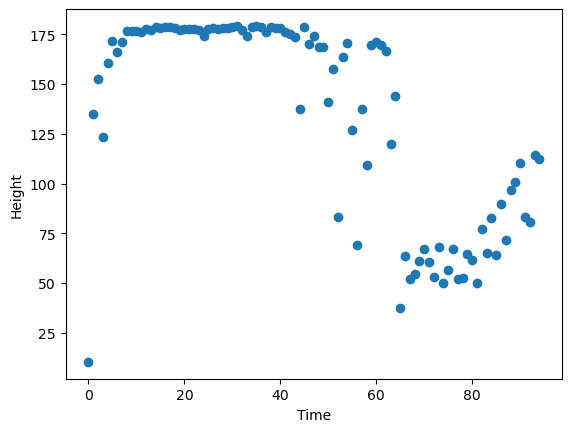

In [12]:
plt.scatter(range(len(h)),mean_height)
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

In [45]:
g = np.load(MOVIE_PATH +'tmp/gel_uint32.npy')

In [13]:
g.max()

4294967295

In [22]:
viewer.add_image(g[0,:,:,20], name='uint32')

<Image layer 'uint32' at 0x1f02a6fb220>

In [47]:
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing.py'>

In [41]:
gel = preprocessing.normalize_to_background(gel,0,20,(0,0),(10,10))

  0%|          | 0/95 [00:00<?, ?it/s]

In [44]:
np.save(MOVIE_PATH +'tmp/gel_norm.npy' , gel)

In [36]:
gel[:,0:20,:,:] = gel[:,-20:,:,:].copy()

In [31]:
importlib.reload(movie_structure)


<module 'movie_structure' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\movie_structure.py'>

In [5]:
from multiprocessing import Process, Queue

def f(t,tp):
    tp.set_height_profile()
    height = 0
    #height = tp.set_height_profile()
    square = tp.set_height_deviation_profile()

    return (t, height, square)

data = []
for t in trange(len(gel)):
        tp = movie_structure.TimePoint(gel[t],mask[t])

        data.append(f(t,tp))




  0%|          | 0/95 [00:00<?, ?it/s]

In [17]:
import seaborn as sns
import pandas as pd


<AxesSubplot:>

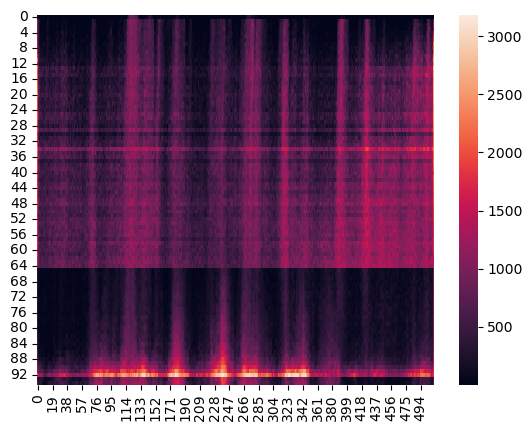

In [35]:
sns.heatmap(square)

<AxesSubplot:>

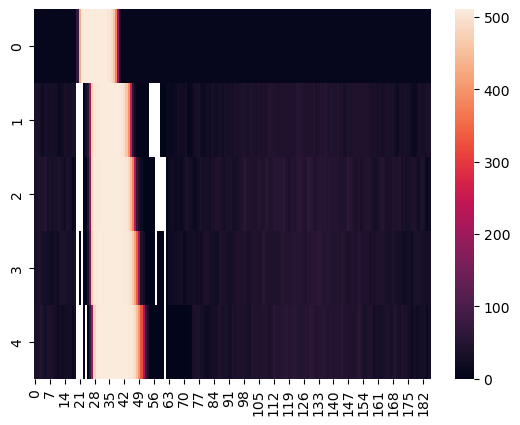

In [21]:
sns.heatmap(height)

In [13]:
df = pd.read_csv(MOVIE_PATH + 'height.csv')



<AxesSubplot:>

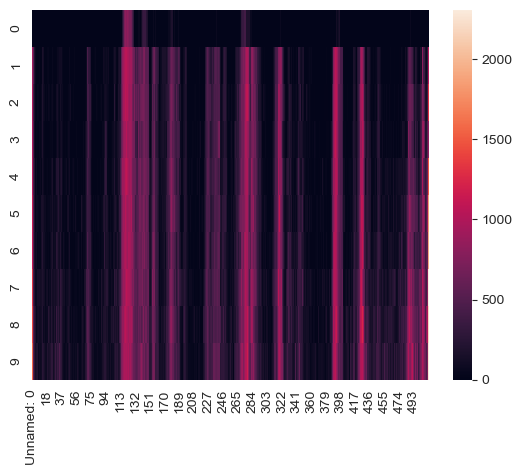

In [17]:
import seaborn as sns
df = pd.read_csv(MOVIE_PATH + 'square.csv')

data = df.drop(['order'],axis=1)
sns.heatmap(data)

<AxesSubplot:>

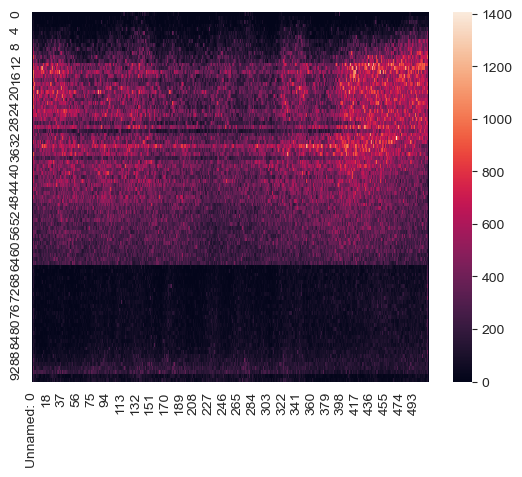

In [20]:
df = pd.read_csv(MOVIE_PATH + 'curvature.csv')

data = df.drop(['order'],axis=1)
sns.heatmap(data)

In [ ]:
data = df.drop(['order'],axis=1)
sns.heatmap(data)

In [8]:
df

,Unnamed: 0,order,height,squate
0,0,0,[15.04296875 15.08984375 15.11523438 15.169921...,[1.67002869e+00 1.54661560e+00 1.31289291e+00 ...
1,1,1,[19.15039062 16.72460938 14.66796875 13.632812...,[ 922.03402328 542.19564438 205.04600525 6...
2,2,2,[20.86132812 17.515625 16.19335938 15.011718...,[ 998.57647324 413.67553711 171.07784653 3...
3,3,3,[23.23828125 19.71289062 17.82421875 16.677734...,[ 994.4627533 486.16170883 118.54722595 1...
4,4,4,[27.02539062 21.64453125 20.57226562 18.898437...,[1054.65755844 431.75254822 225.23305893 2...
...,...,...,...,...
90,90,90,[122.359375 113.97460938 112.83203125 114.38...,[ 998.67163086 667.25912094 632.85069275 50...
91,91,91,[129.8828125 116.8828125 116.61132812 116.01...,[1158.83392334 860.60736084 736.2336998 73...
92,92,92,[128.97070312 117.95507812 117.34765625 118.17...,[1872.62609482 1381.6679039 1206.71116638 110...
93,93,93,[119.61914062 120.640625 120.65625 119.34...,[ 366.21236801 252.26538086 254.08886719 33...


In [10]:
df['height'].to_list()

['[15.04296875 15.08984375 15.11523438 15.16992188 15.203125   15.15234375\n 15.15820312 15.14648438 15.1640625  15.18554688 15.1015625  15.09179688\n 15.1015625  15.10351562 15.03320312 15.03125    15.03320312 14.94921875\n 14.95117188 14.87695312 14.74023438 14.66015625 14.6328125  14.67382812\n 14.63867188 14.6328125  14.61132812 14.5859375  14.609375   14.58398438\n 14.56835938 14.6015625  14.58984375 14.57421875 14.55664062 14.5859375\n 14.6171875  14.62109375 14.70117188 14.7421875  14.75976562 14.78320312\n 14.82226562 14.8515625  14.90234375 14.90625    14.98046875 15.04882812\n 15.08398438 15.13867188 15.140625   15.15625    15.234375   15.25195312\n 15.29492188 15.32226562 15.37109375 15.39648438 15.3984375  15.3671875\n 15.31054688 15.265625   15.2265625  15.25585938 15.21679688 15.21679688\n 15.26367188 15.2265625  15.18164062 15.12304688 15.10351562 15.10742188\n 15.10742188 15.02734375 15.00976562 14.9375     14.86328125 14.8359375\n 14.81640625 14.87695312 14.87109375 14

In [ ]:
import numpy as np
from scipy.ndimage import convolve

def curvature(surface):
    # Compute the partial derivatives of the surface using convolution
    dx = convolve(surface, np.array([[-1, 0, 1]]), mode='constant')
    dy = convolve(surface, np.array([[-1], [0], [1]]), mode='constant')
    dxx = convolve(dx, np.array([[-1, 0, 1]]), mode='constant')
    dyy = convolve(dy, np.array([[-1], [0], [1]]), mode='constant')
    dxy = convolve(dx, np.array([[-1], [0], [1]]), mode='constant')

    # Compute the normal vectors
    normal_x = -dx / np.sqrt(dx**2 + dy**2 + 1e-10)
    normal_y = -dy / np.sqrt(dx**2 + dy**2 + 1e-10)
    normal_z = 1 / np.sqrt(dx**2 + dy**2 + 1e-10)

    # Compute the curvature
    curvature = (dxx * dyy - dxy**2) / (1 + dx**2 + dy**2)**1.5

    return curvature


$curvature = \frac{\frac{\partial^2 z}{\partial x^2} \frac{\partial^2 z}{\partial y^2} - \left(\frac{\partial^2 z}{\partial x \partial y}\right)^2}{\left(1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y}\right)^2\right)^{3/2}}$
